In [1]:
## Tensorflow (TF) 2.0

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
# import all the packages that are needed


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import PIL
from PIL import Image
#import cv2
from os import listdir
import skimage
from skimage import transform
from skimage import data
from tensorflow.python.keras import layers
from tensorflow.python.keras import Model
from tensorflow.python.keras import models
from IPython.display import SVG
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

In [5]:
def image_flipper():
    normal_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Normal'
    down_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Down'
    williams_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Williams'
    

    normal_filenames = []
    for f in listdir(normal_photo_base_path):
        normal_filenames.append(normal_photo_base_path + '\\' + f) # appends the path of the picture to a list
        
        if len(normal_filenames) <= 53:
            image = cv2.imread(normal_photo_base_path + '\\' + f)
            image = cv2.resize(image, (244,244))
            flipped_image = cv2.flip(image, 1)
        #    path = r'Z:\Share\DownSyndrome\4. All Photo\\Normal_Flipped\\' + f + '_flipped' + '.jpg' 
            cv2.imwrite(path, flipped_image)
            

    down_filenames = []
    for f in listdir(down_syndrome_photo_base_path):
        down_filenames.append(down_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list
        
        if len(down_filenames) <= 2270:
            image = cv2.imread(down_syndrome_photo_base_path + '\\' + f)
        try:
            image = cv2.resize(image, (244,244))
        except:
            print(path)
        flipped_image = cv2.flip(image, 1)
        #path = r'Z:\\Share\DownSyndrome\\4. All Photo\\Down_Flipped\\' + f[:-4] + '_flipped' + '.jpg' 
        cv2.imwrite(path, flipped_image)
        
        

    williams_filenames = []
    for f in listdir(williams_syndrome_photo_base_path):
        if f == 'desktop.ini':
            pass
        else:
            williams_filenames.append(williams_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list
        
        #path = r'Z:\\Share\\DownSyndrome\\4. All Photo\\Williams_Flipped\\' + f[:-4] + '_flipped' + '.jpg' 
        image = cv2.imread(williams_syndrome_photo_base_path + '\\' + f)
        try:
            image = cv2.resize(image, (244,244))
        except:
            print(path)
        flipped_image = cv2.flip(image, 1)
        
        cv2.imwrite(path, flipped_image)

In [6]:
def CNN_Preprocess():
    '''
    This functions runs the preprocessing for the images (resizes and converts to a numpy array)
    '''
    
    normal_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Normal'
    down_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Down'
    williams_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Williams'
    

    normal_filenames = []
    for f in listdir(normal_photo_base_path):
        if f == "Thumbs.db":
            pass
        else:
            normal_filenames.append(normal_photo_base_path + '\\' + f) # appends the path of the picture to a list
            

    down_filenames = []
    for f in listdir(down_syndrome_photo_base_path):
        if f == "Thumbs.db":
            pass
        else:
            down_filenames.append(down_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list
        

    williams_filenames = []
    for f in listdir(williams_syndrome_photo_base_path):
        if f == 'desktop.ini' or f == "Thumbs.db":
            pass
        else:
            williams_filenames.append(williams_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list


    image_filenames = normal_filenames + down_filenames + williams_filenames # combines all the image paths together

    normal_label = 0 # labels
    down_label = 1 # labels
    williams_label = 2 # labels

    global number_of_images_each
    number_of_images_each = {'total':0, 'normal':0, 'down':0, 'williams':0}
    number_of_images_each['total'] = len(image_filenames)
    number_of_images_each['normal'] = len(normal_filenames)
    number_of_images_each['down'] = len(down_filenames)
    number_of_images_each['williams'] = len(williams_filenames)
    
    global images
    images = []

    normal_labels = [normal_label] * len(normal_filenames)          # generates labels for the normal images
    down_labels = [down_label] * len(down_filenames)                # generates labels for the down images
    williams_labels = [williams_label] * len(williams_filenames)    # generates labels for the williams images

    labels = normal_labels + down_labels + williams_labels          # adds all the labels together into a single list
    labels = np.array(labels)                                       # converts the list into a numpy array
        
    counter = 1
    for image in image_filenames:
        image_photo = Image.open(image)                                      # reads the image into memory
        resized_image = image_photo.resize((244,244), PIL.Image.ANTIALIAS)   # resizes the image to 244 by 244
        resized_image.save(image,"PNG")                                      # saves the resized image

        images.append(skimage.data.load(image))                              # loads the image as a numpy array
        print('Preprocessing Images for CNN...on image ' + str(counter))     # prints this line for debugging
        
        if skimage.data.load(image).shape == (244, 244, 3):                  # prints this for debugging
            print('true')                                                    # prints this for debugging
        else:
            print('false')                                                   # prints this for debugging
            print(image)                                                     # prints this for debugging
            print(skimage.data.load(image).shape)                            # prints this for debugging

        counter = counter + 1

    images = np.stack(images, axis=0)                              # conbines all the numpy arrays into a single one
    
    #images.dump('X_newphotos.npy')                                # saves the images array
    #labels.dump('y_newphotos.npy')                                # saves the labels array
    
    return images, labels

In [7]:
X, y = CNN_Preprocess()
#X = np.load('X_newphotos.npy')            # loads the saved images numpy array
#y = np.load('y_newphotos.npy')            # loads the saved labels numpy array

C:\ProgramData\Anaconda3\envs\SkinCancer\lib\site-packages\ipykernel_launcher.py:64: UserWarning: This function is deprecated and will be removed in 0.18. Use `skimage.io.load` or `imageio.imread` directly.
C:\ProgramData\Anaconda3\envs\SkinCancer\lib\site-packages\ipykernel_launcher.py:67: UserWarning: This function is deprecated and will be removed in 0.18. Use `skimage.io.load` or `imageio.imread` directly.


Preprocessing Images for CNN...on image 1
true
Preprocessing Images for CNN...on image 2
true
Preprocessing Images for CNN...on image 3
true
Preprocessing Images for CNN...on image 4
true
Preprocessing Images for CNN...on image 5
true
Preprocessing Images for CNN...on image 6
true
Preprocessing Images for CNN...on image 7
true
Preprocessing Images for CNN...on image 8
true
Preprocessing Images for CNN...on image 9
true
Preprocessing Images for CNN...on image 10
true
Preprocessing Images for CNN...on image 11
true
Preprocessing Images for CNN...on image 12
true
Preprocessing Images for CNN...on image 13
true
Preprocessing Images for CNN...on image 14
true
Preprocessing Images for CNN...on image 15
true
Preprocessing Images for CNN...on image 16
true
Preprocessing Images for CNN...on image 17
true
Preprocessing Images for CNN...on image 18
true
Preprocessing Images for CNN...on image 19
true
Preprocessing Images for CNN...on image 20
true
Preprocessing Images for CNN...on image 21
true
P

Text(0, 0.5, 'Number of Images')

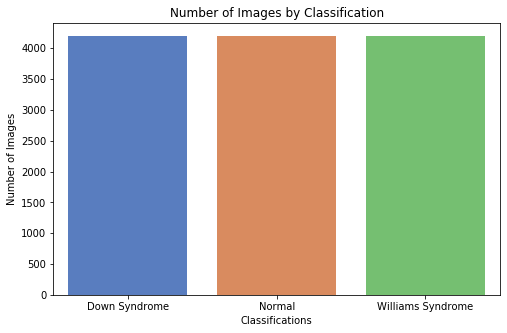

In [8]:
plt.figure(figsize = (8,5))

x_graph = ['Down Syndrome', 'Normal', 'Williams Syndrome']
y_graph = [number_of_images_each['normal'], number_of_images_each['down'], number_of_images_each['williams']]
image_count_graph = sns.barplot(x_graph, y_graph, orient = 'v', palette = 'muted')
image_count_graph.set_title('Number of Images by Classification')
image_count_graph.set_xlabel('Classifications')
image_count_graph.set_ylabel('Number of Images')

Text(0, 0.5, 'Number of Images')

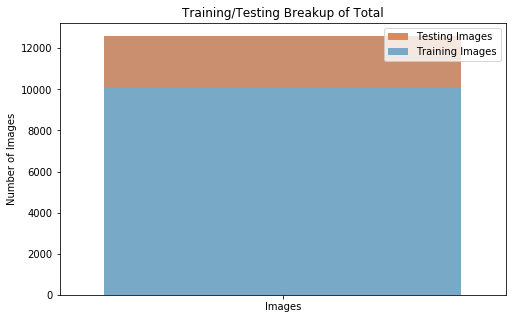

In [9]:
plt.figure(figsize = (8,5))

sns.barplot(x = ['Images'], y = [number_of_images_each['total']], color = '#D98B5F')
sns.barplot(x = ['Images'], y = [number_of_images_each['total']*.8], palette = 'Blues')

topbar = plt.Rectangle((0,0),1,1,fc="#D98B5F", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#78AAC8',  edgecolor = 'none')
plt.legend([topbar, bottombar], ['Testing Images', 'Training Images'])
plt.title('Training/Testing Breakup of Total')
plt.ylabel('Number of Images')

In [10]:
X

array([[[[129, 115, 128],
         [128, 114, 127],
         [128, 114, 126],
         ...,
         [143, 130, 140],
         [143, 130, 140],
         [143, 130, 140]],

        [[129, 116, 127],
         [129, 115, 126],
         [128, 115, 125],
         ...,
         [143, 130, 140],
         [143, 130, 140],
         [143, 130, 140]],

        [[129, 116, 126],
         [129, 116, 126],
         [129, 116, 126],
         ...,
         [143, 130, 140],
         [143, 130, 140],
         [143, 130, 140]],

        ...,

        [[186, 187, 208],
         [175, 176, 197],
         [127, 127, 150],
         ...,
         [152, 146, 160],
         [152, 146, 160],
         [152, 146, 160]],

        [[177, 178, 201],
         [144, 143, 167],
         [ 88,  88, 112],
         ...,
         [152, 146, 160],
         [152, 146, 160],
         [152, 146, 160]],

        [[121, 120, 146],
         [ 85,  85, 110],
         [ 55,  55,  81],
         ...,
         [152, 146, 160],
        

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # splits the data into 75% training and 25% testing

In [12]:
y_cat_train = tf.keras.utils.to_categorical(y_train, 3) # converts the y_train to categorical valules (one-hot encoding)
y_cat_test = tf.keras.utils.to_categorical(y_test, 3) # converts the y_test to categorical valules (one-hot encoding)

In [13]:
X_train = X_train / X_train.max() # converts all the pixel values from between 0 and 255 to between 0 and 1
X_test = X_test / X_test.max() # converts all the pixel values from between 0 and 255 to between 0 and 1

In [14]:
model = tf.keras.Sequential() # generates a model instance

model.add(layers.ZeroPadding2D((1,1),input_shape=(244, 244, 3)))
model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # last classification layer

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

model.compile(loss = 'categorical_crossentropy', # functions
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [15]:
model.summary() # provides a summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 246, 246, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 244, 244, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 246, 246, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 244, 244, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 122, 122, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 128)     7

In [ ]:
results = model.fit(X_train, y_cat_train, epochs = 100) # trains the model to the training data for 100 epochs

Train on 10079 samples
Epoch 1/100
10079/10079 [==============================] - 6586s 653ms/sample - loss: 1.0986 - accuracy: 0.3352
Epoch 2/100
10079/10079 [==============================] - 6864s 681ms/sample - loss: 1.0985 - accuracy: 0.3384
Epoch 3/100
10079/10079 [==============================] - 6532s 648ms/sample - loss: 1.0983 - accuracy: 0.3463
Epoch 4/100
10079/10079 [==============================] - 6474s 642ms/sample - loss: 1.0975 - accuracy: 0.3552
Epoch 5/100
10079/10079 [==============================] - 6600s 655ms/sample - loss: 1.0945 - accuracy: 0.3838
Epoch 6/100
10079/10079 [==============================] - 6456s 641ms/sample - loss: 1.0821 - accuracy: 0.4164
Epoch 7/100
10079/10079 [==============================] - 6573s 652ms/sample - loss: 1.0570 - accuracy: 0.4470
Epoch 8/100
10079/10079 [==============================] - 6239s 619ms/sample - loss: 1.0468 - accuracy: 0.4591
Epoch 9/100
10079/10079 [==============================] - 6183s 613ms/sample - l

In [ ]:
model.metrics_names

In [22]:
model.evaluate(X_test, y_cat_test) # tests the model and finds accuracy

2520/2520 [==============================] - 11s 5ms/step


[0.5618563842760133, 0.9174603172710963]

In [23]:
predictions = model.predict_classes(X_test) # predicts classes on the testing data

In [24]:
print(classification_report(y_test, predictions)) # prints a classification report

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       855
           1       0.89      0.90      0.89       854
           2       0.90      0.90      0.90       811

   micro avg       0.92      0.92      0.92      2520
   macro avg       0.92      0.92      0.92      2520
weighted avg       0.92      0.92      0.92      2520



In [25]:
cm = confusion_matrix(y_test, predictions) # prints a confusion matrix
print(cm)

[[813  29  13]
 [ 23 767  64]
 [ 12  67 732]]


Text(133.82000000000005, 0.5, 'Predicted Values')

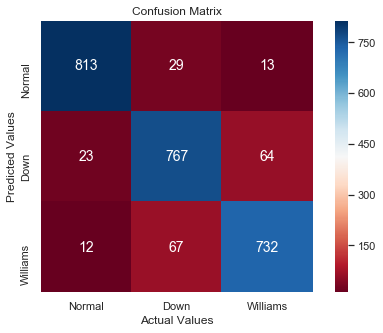

In [26]:
df_cm = pd.DataFrame(cm, index = [i for i in ['Normal', 'Down', 'Williams']], 
                     columns = [i for i in ['Normal', 'Down', 'Williams']])
plt.figure(figsize = (8,5))
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}, cmap = 'RdBu', linecolor = 'black', square = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0.5, 1.0, 'Accuracy vs. Epoch')

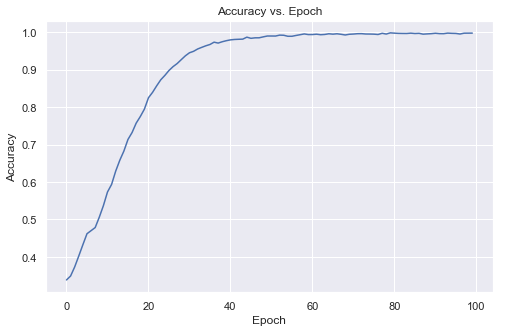

In [27]:
sns.set(font_scale=1)
plt.figure(figsize = (8,5))
plt.plot(results.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy') # displays a graph of accuracy vs epoch
plt.title('Accuracy vs. Epoch')

Text(0.5, 1.0, 'Loss vs. Epoch')

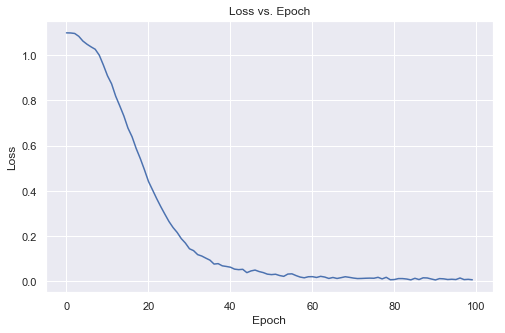

In [28]:
plt.figure(figsize = (8,5))
plt.plot(results.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss') # displays a graph of loss vs epoch
plt.title('Loss vs. Epoch')

Text(0, 0.5, 'Value')

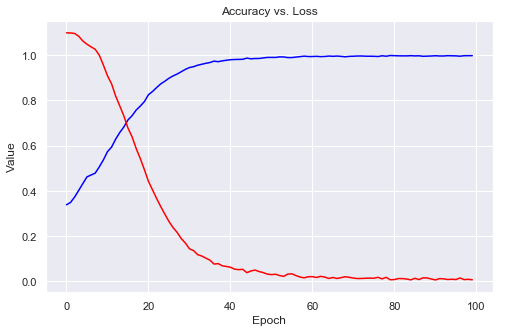

In [29]:
plt.figure(figsize = (8,5))
plt.plot(results.history['acc'], color = 'blue')
plt.plot(results.history['loss'], color = 'red')
plt.title('Accuracy vs. Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')

In [30]:
model.save('Model.h5') # saves the model